In [1]:
%config IPCompleter.greedy=True

# Neuron

Let's start with simple neuron. From the biological point of view, the simplified view on neuron is following.

![Biological neuron](https://upload.wikimedia.org/wikipedia/commons/b/b5/Neuron.svg)

The dendrides are inputs of the neuron. Outputs of other neurons are connected to the neuron by dendrites. The inputs are then passed into the body of the neuron (Nucleus), that can be excitated (activated) or not. When the neuron is excitated, it's output is passed through the axons to the other neurons. This is huge simplification, but it is enough for our purposes.

How we can model this with the artifical neuron? We need to create function, that accepts the neuron's inputs and compute the output. For the simplification, inputs are weighted and summed, the result is then passed to the activation function and it's result is the output of the neuron. We can see this in the following picture.

![Artifical neuron](https://upload.wikimedia.org/wikipedia/commons/b/b6/Artificial_neural_network.png)

*(We don't take threshold into account yet)*

Mathematically, we can rewrite the picture into formula.

$$
y = f(x_1 \cdot w_1 + x_2 \cdot w_2 + \cdots + x_n \cdot w_n) \\
y = f\left(\sum_0^n(x_i \cdot w_i)\right) \\
y = f(\pmb{x} \times \pmb{w}^T) \\
y = f(\pmb{x} \pmb{w}^T)
$$

Before we continue, let's unify the terminology. I will mark vectors using bold text ($\pmb{x}$) and I will consider all one-dimensional vectors are going to be row vectors. All the vector multiplications will be dot products (if not specified otherwise) - so $\pmb{x} \pmb{w}^T$ is dot product and result is scalar. I will be indexing vectors from zero (note that the image using number 1 as the first index).

As the activation function is most of the time set up in advance, during training of the neuron (or the whole neural network), we are looking for the weights $\pmb{w}$, thats lead to the best solution.

And that is everything, we need to know so far. Now, we can go to the first model - perceptron.

# Perceptron

Perceptron is the simplest model - it uses *sign* as the activation function *f*. The *sign* function is defined as follow.

$$
sign(x) = \begin{cases}
       0 &\quad\text{if  } x < 0\\
       1 &\quad\text{if  } x \geq 0 \\
     \end{cases}
$$

The fomula defined separating hyperplane (i.e. hyperplane, that splits data's feature space into two halfs). For example if we the input data have two dimension, the separating hyperplane will be line, where all the data from the first class will be above the line, whereas all the data from the second class will end up below the line.

As the previous paragraph suggested, we can use perceptron for classification task into two classes. It is guarantee, that for lineary separable data (data, that can be separated), the perceptron learning algorithm (see below) always finds the separating hyperplane (you can check the proof for example in [[1]](#Bibliography)).

## Perceptron learning algorithm

The learning algorithm is very simple. First of all, the weights are initialized randomly. The algorithm is looking for instance, that is missclassified. If the true class of the instance is positive (and thus has been classified as negative), the instance is add to the weight vector. If, on the other hand, the instance is negative (and has been classified as positive), the instance is subtract from the weight vector. The algorithm ends, when all the instances are classified correctly.

For the classification, I am going to use random data (I call it playing dataset) generated by *sklearn* library.

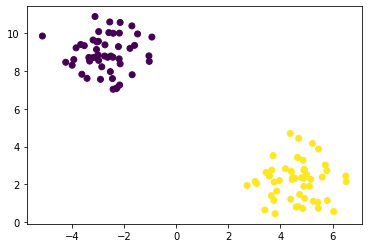

In [2]:
# Load libraries
import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics
import matplotlib.pyplot as plt
import numpy as np

# Define the sign function
def sign(x):
    return 0 if x < 0 else 1

# Generate data
data, classes = sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=2, random_state=42)

# Plot data
plt.scatter(data[:,0], data[:,1], c=classes)
plt.show()

These are the data, that we trying to classify. Now let's write the perceptron learning algorithm.

In [3]:
# Initialize the weights
weights = np.random.RandomState(42).uniform(-2, 2, 2)

# Iterate until convergence
weights_changed = True
while weights_changed:
    weights_changed = False
    
    # for every instance in the data
    for instance, target in zip(data, classes):
        # predict the output of the perceptron
        prediction = sign(instance @ weights)
        if prediction == target:
            # correct classification
            continue
        elif target == 1:
            # positive classified as negative - add the instance to the weights
            weights = weights + instance
        elif target == 0:
            # negative classified as positive - subtract the instance from the weights
            weights = weights - instance
        weights_changed = True

As I said, the perceptron defined separating hyperplane. The hyperplane is defined by the weights of the perceptron and as we are in the 2D, the separating hyperplane is line. You maybe remember formula of line normal form $\alpha x+ \beta y+ \gamma =0$. In our case, the $\pmb{w}$ is the norm of the line and thus $\alpha=w_0$, $\beta=w_1$ and $\gamma=0$ (norm is perpendecular to the line). Let's draw the separating hyperplane.

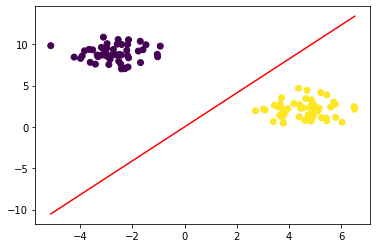

In [4]:
# Compute slope of the line
slope = - weights[0] / weights[1]

# Plot data
plt.scatter(data[:,0], data[:,1], c=classes)

# Plot the separating line
plt.plot(
    [data.min(axis=0)[0], data.max(0)[0]], 
    [slope * data.min(axis=0)[0], slope * data.max(axis=0)[0]], 
    c='r')
plt.show()

As we can see, the line is between the two classes, but the line is moved a litle bit towards the yellow class. We would probably like to have the line exactly between the two classes. However, as all the points are already classified correctly, the algorithm can't adjust the line more. That is in general the drawback of the perceptron - it will find the separating hyperplane, however it don't need to (and probably never) be the best one. Let's try to change the data (by changing the generating seed) and try to train the perceptron again.

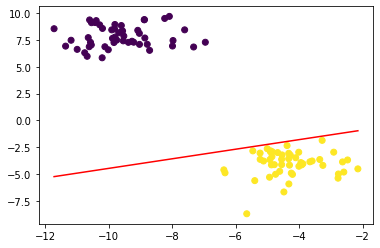

In [5]:
# DATA GENERATION
data, classes = sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=2, random_state=48)

# PERCEPTRON TRAINING
# Initialize the weights
weights = np.random.RandomState(42).uniform(-2, 2, 2)

# Iterate until convergence
weights_changed = True
while weights_changed:
    weights_changed = False
    
    # for every instance in the data
    for instance, target in zip(data, classes):
        # predict the output of the perceptron
        prediction = sign(instance @ weights)
        if prediction == target:
            # correct classification
            continue
        elif target == 1:
            # positive classified as negative - add the instance to the weights
            weights = weights + instance
        elif target == 0:
            # negative classified as positive - subtract the instance from the weights
            weights = weights - instance
        weights_changed = True

# PLOTTING
# Compute slope of the line
slope = - weights[0] / weights[1]

# Plot data
plt.scatter(data[:,0], data[:,1], c=classes)

# Plot the separating line
plt.plot(
    [data.min(axis=0)[0], data.max(0)[0]], 
    [slope * data.min(axis=0)[0], slope * data.max(axis=0)[0]], 
    c='r')
plt.show()

As we can see, all the points are correctly classified, however, the separating hyperplane is exactly next to the yellow points. That is definitely not the line we wanted to obtain! We can try to run the algorithm multiple times with different initialization of the weights and pick up the best line we can obtain. We can as well iterate over the data not sequentially, but randomly. I will discuss other approaches (that doesn't need involnment of the programmer) later.

## Simplifying the update rule

We can simplify the update rule a little bit by using the formula $\pmb{w} = \pmb{w} + (\textrm{target} - \textrm{prediction}) * \pmb{x}$. When the prediction is correct, the subtraction is $0$ and no update is made. When $target = 0$ and $prediction = 1$ (the negative instance is classified positively), the instance is subtracted. When $target = 1$ and $prediction = 0$ (positive instance classified as negative), the instance is added (as in the conditions). We can thus rewrite the whole update into single line. 

Last thing is to make sure we keep track of weights changes. We can compare the new weights to the weights from the previous iteration (otherwise no changes has been made).

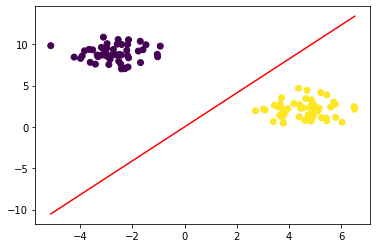

In [6]:
# DATA GENERATION
data, classes = sklearn.datasets.make_blobs(n_samples=100, n_features=2, centers=2, random_state=42)

# PERCEPTRON TRAINING
# Initialize the weights
weights = np.random.RandomState(42).uniform(-2, 2, 2)

# Iterate until convergence
old_weights = None
while (weights != old_weights).any():
    old_weights = weights
    
    # for every instance in the data
    for instance, target in zip(data, classes):
        # predict the output of the perceptron
        prediction = sign(instance @ weights)
        # update the weights
        weights = weights + (target - prediction) * instance

        
# PLOTTING
slope = - weights[0] / weights[1]
plt.scatter(data[:,0], data[:,1], c=classes)
plt.plot(
    [data.min(axis=0)[0], data.max(0)[0]], 
    [slope * data.min(axis=0)[0], slope * data.max(axis=0)[0]], 
    c='r')
plt.show()

# Stepping of the algorithm

Now, when we have the algorithm, we can look into it closer. Because I promissed you a lot of charts, let's plot each update. Firstly, let's create the dataset - I reduced the number of data points, to make the example more clear.

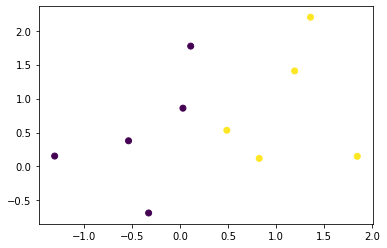

In [7]:
data, classes = sklearn.datasets.make_blobs(
    n_samples=10, 
    n_features=2, 
    centers=[[-1,0.4],[1,0.6]], 
    cluster_std=0.8, 
    random_state=82
)
plt.scatter(data[:,0], data[:,1], c=classes)
plt.show()

Now I will plot all the changes. On the charts bellow, the red and black lines are the separating hyperplane and it's norm. The missclassified instance (on which we are updating the weights) is marked green. The green line represents the instance vector - the vector, that we want to add (or subtract) from the weights. Lastly, the light red and blue lines are the new separating line (after the update) and the corresponding norm.

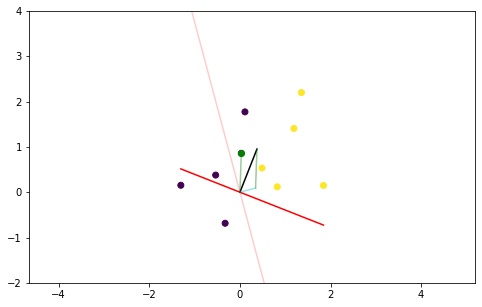

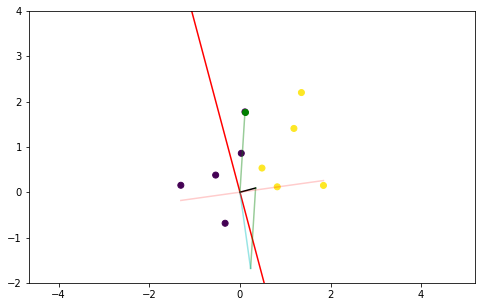

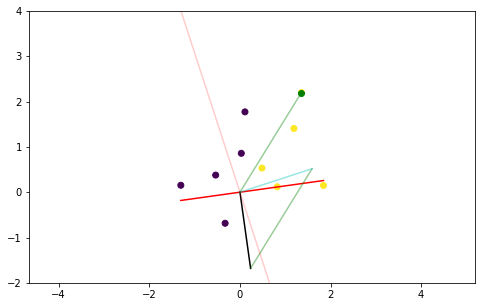

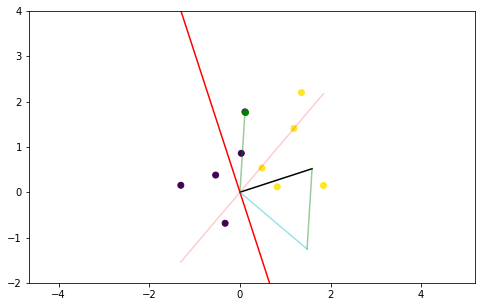

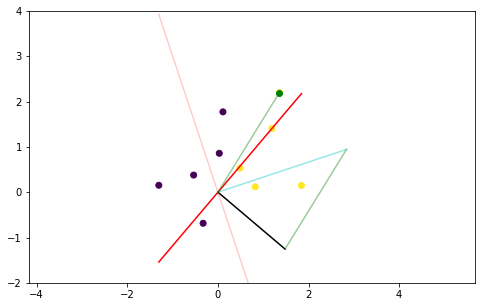

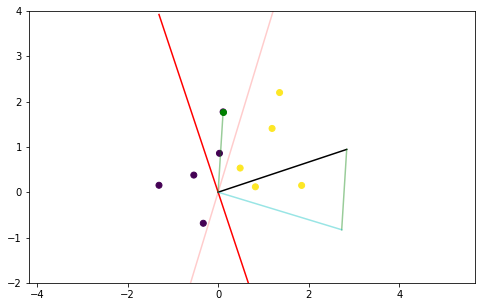

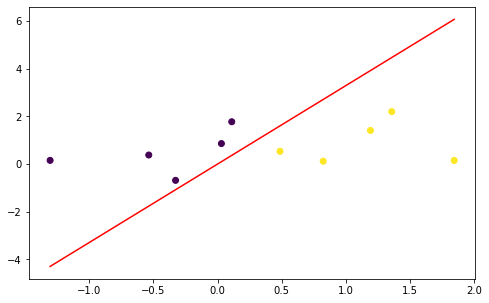

In [8]:
# PERCEPTRON TRAINING
# Initialize the weights
weights = np.random.RandomState(42).uniform(size=2)

# Iterate until convergence
weights_changed = True
while weights_changed:
    weights_changed = False
    # for every instance in the data
    for instance, target in zip(data, classes):
        # predict the output of the perceptron
        prediction = sign(instance @ weights)
        # update the weights
        weights_new = weights + (target - prediction) * instance
        
        # plot the change
        if (weights != weights_new).any():
            slope = - weights[0] / weights[1]  # calculate the slope
            plt.figure(figsize=(8, 5))
            plt.plot(
                [data.min(axis=0)[0], data.max(0)[0]], 
                [slope * data.min(axis=0)[0], slope * data.max(axis=0)[0]], 
                c='r')  # plot the separating line
            plt.plot([0, weights[0]],[0, weights[1]], c='black')  # plot the norm
            plt.scatter(data[:,0], data[:,1], c=classes)  # plot the data
            plt.scatter(instance[0], instance[1], c='g')  # plot the missclassified instance
            plt.plot([0, instance[0]], [0, instance[1]], c='g', alpha=0.4)  # plot the instance vector
            plt.plot(
                [weights[0], weights[0] + (target - prediction) * instance[0]], 
                [weights[1], weights[1] + (target - prediction) * instance[1]],
                c='g', alpha=0.4)  # plot the instance vector from the normal
            plt.plot(
                [0, weights[0] + (target - prediction) * instance[0]], 
                [0, weights[1] + (target - prediction) * instance[1]], 
                c='c', alpha=0.4)  # plot new normal
            slope_new = - weights_new[0] / weights_new[1]  # calculate the slope of new line
            plt.plot(
                [data.min(axis=0)[0], data.max(0)[0]], 
                [slope_new * data.min(axis=0)[0], slope_new * data.max(axis=0)[0]], 
                c='r', alpha=0.2)  # plot the separating line
            plt.axis('equal')
            plt.ylim(-2,4)
            plt.show()
        
        weights_changed = weights_changed or (weights != weights_new).any()
        weights = weights_new
        
# PLOTTING THE FINAL WEIGHTS
slope = - weights[0] / weights[1]
plt.figure(figsize=(8, 5))
plt.scatter(data[:,0], data[:,1], c=classes)
plt.plot(
    [data.min(axis=0)[0], data.max(0)[0]], 
    [slope * data.min(axis=0)[0], slope * data.max(axis=0)[0]], 
    c='r')
plt.show()

As you can see, after each update, the norm move closer (for the positive data) or away (for the negative data) from the missclassified instance. This is the main idea of the perceptron learning algorithm.

# Bias

So far, the haven't used bias. If you remember the norm line formula $\alpha x+ \beta y+ \gamma =0$, we set up $\gamma$ to zero. Because of that, the line always goes through the $[0,0]$ coordinate. But what if we have data, that can't be separated that way? We would like to introduce the bias. First, let's generate the dataset.

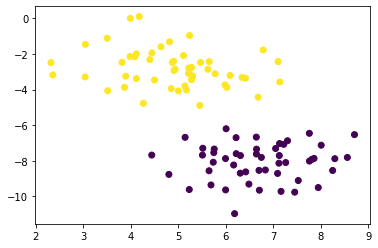

In [9]:
data, classes = sklearn.datasets.make_blobs(
    n_features=2,
    centers=2,
    random_state=44
)
plt.scatter(data[:,0], data[:,1], c=classes)
plt.show()

This dataset can't be separated using our perceptron algorithm, because no line going through $[0,0]$ can separate it. We will introduce the bias - we add some term $b$ to the linear combination of inputs.

$$
y=f(\pmb{x}\pmb{w}^T + b)
$$

The bias is learned the same way, as the weights. When we missclassify the positive instance, we increase it by 1. When we missclassify the negative instance, we decrease it by 1.

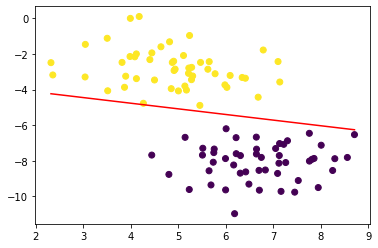

In [10]:
# PERCEPTRON TRAINING
# Initialize the weights
weights = np.random.RandomState(42).uniform(-2, 2, 2)
bias = 0

# Iterate until convergence
old_weights = None
old_bias = None
while (weights != old_weights).any() or bias != old_bias:
    old_weights = weights
    old_bias = bias
    
    # for every instance in the data
    for instance, target in zip(data, classes):
        # predict the output of the perceptron
        prediction = sign(instance @ weights + bias)
        # update the weights
        weights = weights + (target - prediction) * instance
        bias = bias + (target - prediction)
        
# plot
slope = - weights[0] / weights[1]
plt.scatter(data[:,0], data[:,1], c=classes)
plt.plot(
    [data.min(axis=0)[0], data.max(0)[0]], 
    [slope * data.min(axis=0)[0] - bias / weights[1], slope * data.max(axis=0)[0] - bias / weights[1]], 
    c='r')
plt.show()

As we can see, the line moved down and no longer goes through $[0,0]$. Sometimes, it is pointless to handle bias separately. We can include it in weights and pad the examples with 1. It is the same, as if we moved data into new dimension. Let's show it on one-dimensional data. We have positive data $\left\{1,2,3\right\}$ and negative data $\left\{4,5,6\right\}$. We wopuld like to separate them by hyperplane (that is in this case point), that goes through 0. That is not possible, because only the point 0 can be the separating hyperplane.

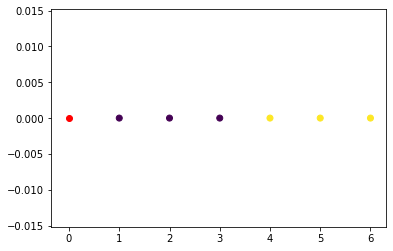

In [11]:
data = np.array([[1],[2],[3],[4],[5],[6]])
classes = np.array([0,0,0,1,1,1])
plt.scatter(data, np.zeros((6,)), c=classes)
plt.scatter(0,0,c='r')
plt.show()

However, if we moved the data into the new dimension (that would be 2D in this case), the separating hyperplane is line and the data are lineary separated.

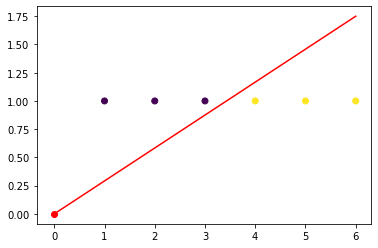

In [12]:
data = np.array([[1],[2],[3],[4],[5],[6]])
classes = np.array([0,0,0,1,1,1])
plt.scatter(data, np.ones((6,)), c=classes)
plt.scatter(0,0,c='r')
plt.plot([0, 6],[0, 1.75], c='r')
plt.show()

We can deal with the bias the same way. We add new dimension with only ones and use 3 weights in the perceptron algorithm.

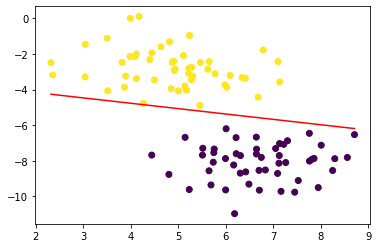

In [13]:
# DATA GENERATION
data, classes = sklearn.datasets.make_blobs(
    n_features=2,
    centers=2,
    random_state=44
)
data = np.hstack([data, np.ones((data.shape[0],1))])

# PERCEPTRON TRAINING
# Initialize the weights
weights = np.random.RandomState(42).uniform(-2, 2, 3)

# Iterate until convergence
old_weights = None
while (weights != old_weights).any():
    old_weights = weights
    
    # for every instance in the data
    for instance, target in zip(data, classes):
        # predict the output of the perceptron
        prediction = sign(instance @ weights)
        # update the weights
        weights = weights + (target - prediction) * instance
        
# plot
slope = - weights[0] / weights[1]
bias = weights[2] / weights[1]
plt.scatter(data[:,0], data[:,1], c=classes)
plt.plot(
    [data.min(axis=0)[0], data.max(0)[0]], 
    [slope * data.min(axis=0)[0] - bias, slope * data.max(axis=0)[0] - bias],
    c='r')
plt.show()

# Multidimensional case

So far I shown only two dimensional cases. There is nothing, what stops use from use more dimensional data, except we won't be able to plot them. Let's try 10 dimensions.

In [14]:
# DATA GENERATION
data, classes = sklearn.datasets.make_blobs(
    n_samples=1000, 
    n_features=10,
    centers=2,
    random_state=42
)
data = np.hstack([data, np.ones((data.shape[0],1))])

train_data, test_data, train_classes, test_classes = sklearn.model_selection.train_test_split(data, classes, test_size=0.15)

# PERCEPTRON TRAINING
weights = np.random.RandomState(42).uniform(-2, 2, 11)
old_weights = None
while (weights != old_weights).any():
    old_weights = weights
    for instance, target in zip(train_data, train_classes):
        prediction = sign(instance @ weights)
        weights = weights + (target - prediction) * instance
        
# TEST
predictions = [sign(instance @ weights) for instance in test_data]
print(f'Accuracy: {sklearn.metrics.accuracy_score(test_classes, predictions)}')

Accuracy: 1.0


# Bibliography

[1] The Perceptron Learning Algorithm and its Convergence, Shivaram Kalyanakrishnan, 21 January 2017, [online](https://www.cse.iitb.ac.in/~shivaram/teaching/old/cs344+386-s2017/resources/classnote-1.pdf)